## Other High Street Dimensions

In [43]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from requests import get
from urllib.parse import urlparse

In [44]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
import mapclassify as mc
import pysal as p
import palettable.matplotlib as palmpl
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette

***

### BRINGING IN OTHER DATASETS

In [45]:
CamHS = gpd.read_file('Complete HS/CAMDEN_HS.shp')

In [46]:
CamHS

,objectid,highstreet,highstre_1,area_ha,gdb_geomat,layer,path,geometry
0,594,594,"Eversholt Street, Somers Town",6.303698,None,Eversholt,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529676.878 182864.075, 529679.937 18..."
1,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,Cricklewood,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((523415.282 186284.726, 523422.134 18..."
2,372,372,"Fortune Green Road, Fortune Green.",6.581487,None,Fortune,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((525198.994 185637.081, 525201.838 18..."
3,285,285,"Fortress Road, Tufnell Park.",28.325719,None,Fortress,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529209.157 185757.682, 529206.506 18..."
4,303,303,"Belsize Lane, Belsize Park.",5.069615,None,Belsize,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526892.645 185059.806, 526900.890 18..."
5,287,287,Camden Town HS,56.349258,None,CamdenT,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528129.528 184489.100, 528138.350 18..."
6,97,97,Brecknock Road & York Way.,15.327961,None,Brecknock,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529626.963 185290.470, 529619.385 18..."
7,468,468,"Mansfield Road, Gospel Oak",3.508042,None,Mansfield,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528267.619 185602.755, 527975.356 18..."
8,304,304,"Loudoun Road, South Hampstead.",8.078871,None,Loudoun,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526350.252 184351.109, 526360.006 18..."
9,328,328,"Queen?s Crescent, Gospel Oak.",10.314779,None,Queens,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528422.038 185153.550, 528417.412 18..."


In [47]:
print(CamHS.crs)

epsg:27700


In [48]:
CamHS['highstreet_name'] = CamHS['layer']

## 1. Public Conveniences

In [49]:
PC = pd.read_csv('High Street Dimensions/Public_Conveniences_In_Camden_Map.csv')

In [50]:
PC = gpd.GeoDataFrame(PC, geometry = gpd.points_from_xy(PC['Easting'], PC['Northing'], crs="epsg:27700"))

In [51]:
PC1 = gpd.clip(PC, CamHS)

<AxesSubplot:>

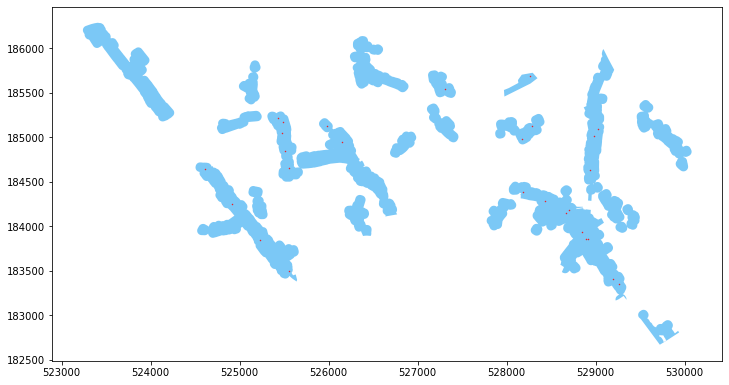

In [52]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

CamHS.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
PC1.plot(color= "red", markersize=0.2, ax=ax)

In [53]:
#for each index I want to count the number of points within 

In [54]:
polygons = CamHS.copy()

# Spatial Joins
pointsInPolygon = gpd.sjoin(PC, polygons, how="inner", op='intersects')

# Add a field with 1 as a constant value
pointsInPolygon['public toilets']=1

# Group according to the column by which you want to aggregate data
pointsInPolygon = pointsInPolygon.groupby(['highstreet_name']).sum()

In [55]:
pointsInPolygon

,E-Mail,Easting,Northing,Longitude,Latitude,Socrata ID,index_right,objectid,highstreet,area_ha,public toilets
highstreet_name,,,,,,,,,,,
CamdenT,0.0,4.759106e+06,1.655388e+06,-1.298961,463.856424,114,45,2583,2583,507.143318,9
Fortress,0.0,1.586941e+06,5.547390e+05,-0.423655,154.645128,63,9,855,855,84.977156,3
Kilburn,0.0,2.100311e+06,7.362259e+05,-0.791094,206.166225,95,52,1340,1340,159.936773,4
Mansfield,0.0,5.282660e+05,1.856820e+05,-0.151237,51.555450,23,7,468,468,3.508042,1
Queens,0.0,1.056458e+06,3.701140e+05,-0.304011,103.099689,83,18,656,656,20.629557,2
SouthEnd,0.0,5.273110e+05,1.855360e+05,-0.165065,51.554347,45,15,307,307,6.131431,1
WestEnd,0.0,3.679587e+06,1.294997e+06,-1.323828,360.849307,255,126,3885,3885,327.242856,7


In [56]:
toilets = pointsInPolygon[['public toilets']]

In [57]:
toilets

,public toilets
highstreet_name,
CamdenT,9
Fortress,3
Kilburn,4
Mansfield,1
Queens,2
SouthEnd,1
WestEnd,7


In [58]:
CamHS = pd.merge(CamHS, toilets, how = "outer", on= "highstreet_name")

In [59]:
CamHS

,objectid,highstreet,highstre_1,area_ha,gdb_geomat,layer,path,geometry,highstreet_name,public toilets
0,594,594,"Eversholt Street, Somers Town",6.303698,None,Eversholt,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529676.878 182864.075, 529679.937 18...",Eversholt,NaN
1,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,Cricklewood,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((523415.282 186284.726, 523422.134 18...",Cricklewood,NaN
2,372,372,"Fortune Green Road, Fortune Green.",6.581487,None,Fortune,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((525198.994 185637.081, 525201.838 18...",Fortune,NaN
3,285,285,"Fortress Road, Tufnell Park.",28.325719,None,Fortress,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529209.157 185757.682, 529206.506 18...",Fortress,3.0
4,303,303,"Belsize Lane, Belsize Park.",5.069615,None,Belsize,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526892.645 185059.806, 526900.890 18...",Belsize,NaN
5,287,287,Camden Town HS,56.349258,None,CamdenT,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528129.528 184489.100, 528138.350 18...",CamdenT,9.0
6,97,97,Brecknock Road & York Way.,15.327961,None,Brecknock,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529626.963 185290.470, 529619.385 18...",Brecknock,NaN
7,468,468,"Mansfield Road, Gospel Oak",3.508042,None,Mansfield,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528267.619 185602.755, 527975.356 18...",Mansfield,1.0
8,304,304,"Loudoun Road, South Hampstead.",8.078871,None,Loudoun,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526350.252 184351.109, 526360.006 18...",Loudoun,NaN
9,328,328,"Queen?s Crescent, Gospel Oak.",10.314779,None,Queens,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528422.038 185153.550, 528417.412 18...",Queens,2.0


### 2. Tree Coverage 
    - https://opendata.camden.gov.uk/Environment/Trees-In-Camden/csqp-kdss

In [60]:
Trees = pd.read_csv('High Street Dimensions/Trees_In_Camden.csv')

In [61]:
Trees = gpd.GeoDataFrame(Trees, geometry = gpd.points_from_xy(Trees['Easting'], Trees['Northing'], crs="epsg:27700"))

In [62]:
Trees1 = gpd.clip(Trees, CamHS)

<AxesSubplot:>

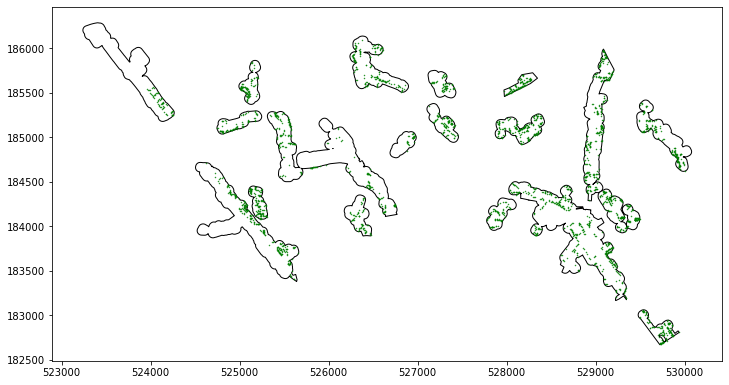

In [63]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

CamHS.plot(edgecolor="black", facecolor='white', ax=ax)
Trees1.plot(color= "green", markersize=0.2, ax=ax)

In [64]:
polygons = CamHS.copy()

# Spatial Joins
pointsInPolygon = gpd.sjoin(Trees, polygons, how="inner", op='intersects')

# Add a field with 1 as a constant value
pointsInPolygon['trees']=1

# Group according to the column by which you want to aggregate data
pointsInPolygon = pointsInPolygon.groupby(['highstreet_name']).sum()

In [65]:
trees = pointsInPolygon[['trees']]

In [66]:
trees

,trees
highstreet_name,
Belsize,33
Brecknock,162
CamdenT,405
Cricklewood,62
Eversholt,133
Fortress,290
Fortune,99
Hampstead,164
Haverstock,96


In [67]:
CamHS = pd.merge(CamHS, trees, how = "outer", on= "highstreet_name")

In [68]:
CamHS

,objectid,highstreet,highstre_1,area_ha,gdb_geomat,layer,path,geometry,highstreet_name,public toilets,trees
0,594,594,"Eversholt Street, Somers Town",6.303698,None,Eversholt,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529676.878 182864.075, 529679.937 18...",Eversholt,NaN,133
1,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,Cricklewood,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((523415.282 186284.726, 523422.134 18...",Cricklewood,NaN,62
2,372,372,"Fortune Green Road, Fortune Green.",6.581487,None,Fortune,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((525198.994 185637.081, 525201.838 18...",Fortune,NaN,99
3,285,285,"Fortress Road, Tufnell Park.",28.325719,None,Fortress,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529209.157 185757.682, 529206.506 18...",Fortress,3.0,290
4,303,303,"Belsize Lane, Belsize Park.",5.069615,None,Belsize,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526892.645 185059.806, 526900.890 18...",Belsize,NaN,33
5,287,287,Camden Town HS,56.349258,None,CamdenT,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528129.528 184489.100, 528138.350 18...",CamdenT,9.0,405
6,97,97,Brecknock Road & York Way.,15.327961,None,Brecknock,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529626.963 185290.470, 529619.385 18...",Brecknock,NaN,162
7,468,468,"Mansfield Road, Gospel Oak",3.508042,None,Mansfield,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528267.619 185602.755, 527975.356 18...",Mansfield,1.0,95
8,304,304,"Loudoun Road, South Hampstead.",8.078871,None,Loudoun,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526350.252 184351.109, 526360.006 18...",Loudoun,NaN,64
9,328,328,"Queen?s Crescent, Gospel Oak.",10.314779,None,Queens,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528422.038 185153.550, 528417.412 18...",Queens,2.0,193


### Transport

In [69]:
transport = gpd.read_file('greater-london-latest-free.shp/gis_osm_transport_a_free_1.shp')

In [70]:
transport1 = gpd.read_file('greater-london-latest-free.shp/gis_osm_transport_free_1.shp')

In [71]:
transport = transport.to_crs('EPSG:27700')
transport1 = transport1.to_crs('EPSG:27700')

In [72]:
transport = gpd.clip(transport, CamHS)

In [73]:
transport

,osm_id,code,fclass,name,geometry
45,108429756,5641,taxi,Devon Cars,"POLYGON ((525473.840 183501.790, 525475.722 18..."
140,453127296,5641,taxi,Mornington Cars,"POLYGON ((529184.899 183361.876, 529184.854 18..."
143,470422326,5641,taxi,Amic,"POLYGON ((524723.794 183946.639, 524728.962 18..."
185,913673439,5622,bus_station,24 Bus - End of Route,"POLYGON ((527295.854 185550.057, 527297.455 18..."


In [74]:
transport1 = gpd.clip(transport1, CamHS)

In [75]:
transport1['fclass'] = transport1['fclass'].astype('category')

In [76]:
list(transport1['fclass'].unique())

['bus_stop', 'taxi', 'railway_station', 'ferry_terminal']

In [77]:
bus = transport1[(transport1['fclass'] == 'bus_stop')]

In [78]:
# Spatial Joins
pointsInPolygon = gpd.sjoin(bus, polygons, how="inner", op='intersects')

# Add a field with 1 as a constant value
pointsInPolygon['bus_stops']=1

# Group according to the column by which you want to aggregate data
pointsInPolygon = pointsInPolygon.groupby(['highstreet_name']).sum()

In [79]:
busstops = pointsInPolygon[['bus_stops']]

In [80]:
CamHS = pd.merge(CamHS, busstops, how = "outer", on= "highstreet_name")

In [81]:
train =  transport1[(transport1['fclass'] == 'railway_station')]

In [82]:
# Spatial Joins
pointsInPolygon = gpd.sjoin(train, polygons, how="inner", op='intersects')

# Add a field with 1 as a constant value
pointsInPolygon['train']=1

# Group according to the column by which you want to aggregate data
pointsInPolygon = pointsInPolygon.groupby(['highstreet_name']).sum()

In [83]:
trains = pointsInPolygon[['train']]

In [84]:
CamHS = pd.merge(CamHS, trains, how = "outer", on= "highstreet_name")

In [85]:
CamHS

,objectid,highstreet,highstre_1,area_ha,gdb_geomat,layer,path,geometry,highstreet_name,public toilets,trees,bus_stops,train
0,594,594,"Eversholt Street, Somers Town",6.303698,None,Eversholt,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529676.878 182864.075, 529679.937 18...",Eversholt,NaN,133,NaN,NaN
1,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,Cricklewood,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((523415.282 186284.726, 523422.134 18...",Cricklewood,NaN,62,14.0,NaN
2,372,372,"Fortune Green Road, Fortune Green.",6.581487,None,Fortune,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((525198.994 185637.081, 525201.838 18...",Fortune,NaN,99,5.0,NaN
3,285,285,"Fortress Road, Tufnell Park.",28.325719,None,Fortress,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529209.157 185757.682, 529206.506 18...",Fortress,3.0,290,17.0,1.0
4,303,303,"Belsize Lane, Belsize Park.",5.069615,None,Belsize,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526892.645 185059.806, 526900.890 18...",Belsize,NaN,33,NaN,NaN
5,287,287,Camden Town HS,56.349258,None,CamdenT,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528129.528 184489.100, 528138.350 18...",CamdenT,9.0,405,30.0,3.0
6,97,97,Brecknock Road & York Way.,15.327961,None,Brecknock,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529626.963 185290.470, 529619.385 18...",Brecknock,NaN,162,6.0,NaN
7,468,468,"Mansfield Road, Gospel Oak",3.508042,None,Mansfield,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528267.619 185602.755, 527975.356 18...",Mansfield,1.0,95,4.0,1.0
8,304,304,"Loudoun Road, South Hampstead.",8.078871,None,Loudoun,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526350.252 184351.109, 526360.006 18...",Loudoun,NaN,64,1.0,1.0
9,328,328,"Queen?s Crescent, Gospel Oak.",10.314779,None,Queens,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528422.038 185153.550, 528417.412 18...",Queens,2.0,193,3.0,NaN


<AxesSubplot:>

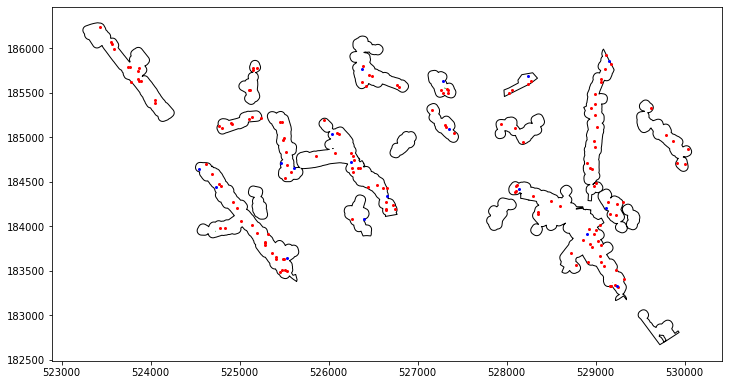

In [86]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

CamHS.plot(edgecolor="black", facecolor='white', ax=ax)
transport.plot(color= "green", markersize=4, ax=ax)
bus.plot(color= "red", markersize=4, ax=ax)
train.plot(color= "blue", markersize=4, ax=ax)

OSM POINT OF INTEREST

In [87]:
pois  = gpd.read_file('OSM Camden/Camden pois points.shp')

In [88]:
pois = pois.to_crs('EPSG:27700')

<AxesSubplot:>

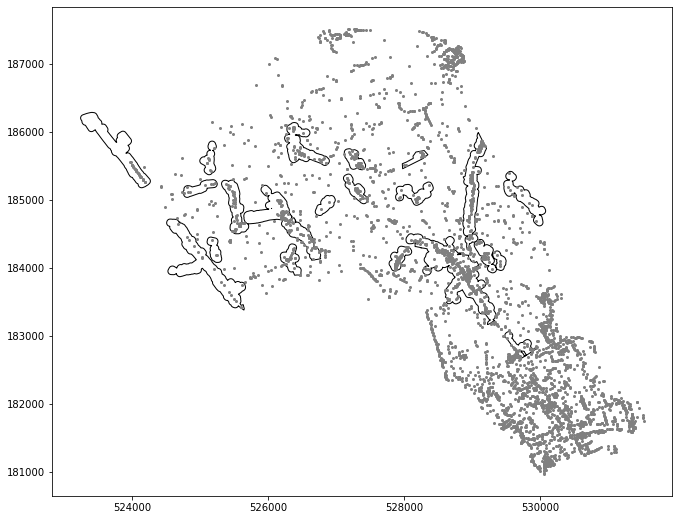

In [89]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

CamHS.plot(edgecolor="black", facecolor='white', ax=ax)
pois.plot(color= "grey", markersize=4, ax=ax)

In [90]:
pois1 = gpd.clip(pois, CamHS)

<AxesSubplot:>

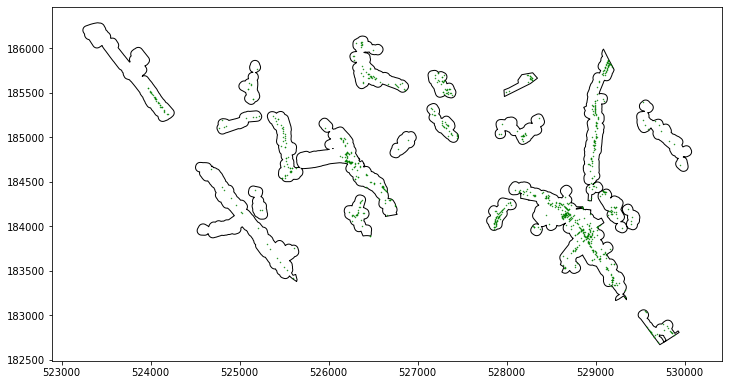

In [91]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

CamHS.plot(edgecolor="black", facecolor='white', ax=ax)
pois1.plot(color= "green", markersize=0.2, ax=ax)

In [92]:
pois

,osm_id,code,fclass,name,geometry
0,108042,2304,pub,Simmons,POINT (529447.685 182163.626)
1,13799212,2007,library,Holborn Library,POINT (530835.223 181922.569)
2,21593232,2304,pub,The Knights Templar,POINT (531120.281 181290.740)
3,21593236,2304,pub,Ship Tavern,POINT (530597.209 181489.064)
4,21593237,2305,bar,The Polish Bar (Na Zdrowie),POINT (530614.006 181501.914)
...,...,...,...,...,...
4327,8718779378,2902,bench,None,POINT (526428.263 184414.083)
4328,8718779379,2902,bench,None,POINT (526476.291 184383.644)
4329,8718779380,2902,bench,None,POINT (526517.047 184338.247)
4330,8728793319,2006,telephone,None,POINT (529810.723 182854.880)


In [93]:
pois['fclass'] = pois['fclass'].astype('category')

In [94]:
poi_dummies = pd.get_dummies(pois['fclass'])

In [95]:
poi_dummies

,arts_centre,artwork,atm,attraction,bakery,bank,bar,beauty_shop,bench,beverages,...,university,vending_any,vending_machine,vending_parking,veterinary,video_shop,viewpoint,waste_basket,water_well,wayside_shrine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4327,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4328,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4329,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
test = pd.concat([pois, poi_dummies], axis=1)

In [97]:
test

,osm_id,code,fclass,name,geometry,arts_centre,artwork,atm,attraction,bakery,...,university,vending_any,vending_machine,vending_parking,veterinary,video_shop,viewpoint,waste_basket,water_well,wayside_shrine
0,108042,2304,pub,Simmons,POINT (529447.685 182163.626),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13799212,2007,library,Holborn Library,POINT (530835.223 181922.569),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21593232,2304,pub,The Knights Templar,POINT (531120.281 181290.740),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21593236,2304,pub,Ship Tavern,POINT (530597.209 181489.064),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21593237,2305,bar,The Polish Bar (Na Zdrowie),POINT (530614.006 181501.914),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4327,8718779378,2902,bench,None,POINT (526428.263 184414.083),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4328,8718779379,2902,bench,None,POINT (526476.291 184383.644),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4329,8718779380,2902,bench,None,POINT (526517.047 184338.247),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4330,8728793319,2006,telephone,None,POINT (529810.723 182854.880),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
test.drop(['fclass'], inplace=True, axis=1)

In [99]:
POIs = list(pois.fclass.unique())

In [100]:
polygons = CamHS.copy()

# Spatial Joins
pointsInPolygon = gpd.sjoin(test, polygons, how="inner", op='intersects')

# Add a field with 1 as a constant value
pointsInPolygon['pois']=1

# Group according to the column by which you want to aggregate data
pointsInPolygon = pointsInPolygon.groupby(['highstreet_name']).sum()

In [101]:
pointsInPolygon

,code,arts_centre,artwork,atm,attraction,bakery,bank,bar,beauty_shop,bench,...,wayside_shrine,index_right,objectid,highstreet,area_ha,public toilets,trees,bus_stops,train,pois
highstreet_name,,,,,,,,,,,,,,,,,,,,,
Belsize,4088,0,0,0,0,0,0,0,0,0,...,0,8,606,606,10.139230,0.0,66,0.0,0.0,2
Brecknock,22688,0,0,0,0,0,0,0,0,0,...,0,60,970,970,153.279607,0.0,1620,60.0,0.0,10
CamdenT,834013,0,5,12,2,6,2,13,3,19,...,0,1705,97867,97867,19215.096844,3069.0,138105,10230.0,1023.0,341
Cricklewood,72239,0,0,0,0,1,0,0,1,0,...,0,30,9660,9660,850.165780,0.0,1860,420.0,0.0,30
Eversholt,56034,0,1,0,0,0,0,0,0,1,...,0,0,14256,14256,151.288750,0.0,3192,0.0,0.0,24
Fortress,306491,0,0,9,0,0,0,2,4,1,...,0,375,35625,35625,3540.714846,375.0,36250,2125.0,125.0,125
Fortune,17944,0,0,0,0,0,0,0,0,0,...,0,16,2976,2976,52.651898,0.0,792,40.0,0.0,8
Hampstead,113200,0,3,1,0,0,0,0,0,5,...,0,564,26038,26038,846.739045,0.0,7708,329.0,47.0,47
Haverstock,65284,0,0,0,0,0,0,0,0,2,...,0,308,8568,8568,198.081309,0.0,2688,112.0,28.0,28


In [102]:
POIs = pointsInPolygon

In [103]:
POIs.to_csv("outputs_csv/poi counts for camden hs.csv")

### 3. Street Lighting

In [405]:
streetlight =  gpd.read_file('High Street Dimensions/Camden Street Lighting/geo_export_dcf3d4be-8b47-4503-8341-a46341c515aa.shp')

In [406]:
streetlight = streetlight.to_crs('EPSG:27700')

<AxesSubplot:>

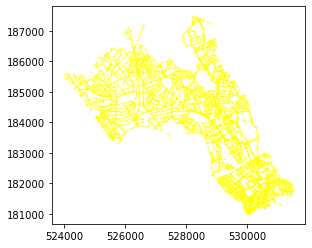

In [407]:
streetlight.plot(color= "yellow", markersize=0.1)

In [408]:
streetlights = gpd.clip(streetlight, CamHS)

In [409]:
# Spatial Joins
pointsInPolygon = gpd.sjoin(streetlights, polygons, how="inner", op='intersects')

# Add a field with 1 as a constant value
pointsInPolygon['streetlights']=1

# Group according to the column by which you want to aggregate data
pointsInPolygon = pointsInPolygon.groupby(['highstreet_name']).sum()

In [410]:
pointsInPolygon

,wattage,column_hei,easting,northing,longitude,latitude,index_right,objectid,highstreet,area_ha,public toilets,trees,bus_stops,train,streetlights
highstreet_name,,,,,,,,,,,,,,,
Belsize,1559.0,21600.0,21600410.0,7582031.0,-7.054874,2113.508778,164,12423,12423,207.854209,0.0,1353,0.0,0.0,41
Brecknock,3901.0,42900.0,42907367.0,14985307.0,-10.571342,4175.471032,486,7857,7857,1241.564815,0.0,13122,486.0,0.0,81
CamdenT,29451.0,294900.0,259097486.0,90136241.0,-70.849937,25254.495012,2450,140630,140630,27611.136228,4410.0,198450,14700.0,1470.0,490
Cricklewood,904.0,10200.0,8909967.0,3151845.0,-3.589756,876.415775,17,5474,5474,481.760609,0.0,1054,238.0,0.0,17
Eversholt,2033.0,26700.0,22776746.0,7863163.0,-5.663677,2215.781575,0,25542,25542,271.059010,0.0,5719,0.0,0.0,43
Fortress,15641.0,161800.0,135955797.0,47559507.0,-36.165193,13248.262850,771,73245,73245,7279.709724,771.0,74530,4369.0,257.0,257
Fortune,1894.0,23300.0,20479706.0,7237277.0,-7.667963,2010.651327,78,14508,14508,256.678004,0.0,3861,195.0,0.0,39
Hampstead,12322.0,82400.0,99501942.0,35117561.0,-33.480362,9744.269878,2268,104706,104706,3404.971904,0.0,30996,1323.0,189.0,189
Haverstock,1668.0,22800.0,17927543.0,6294716.0,-5.631462,1752.726951,374,10404,10404,240.527304,0.0,3264,136.0,34.0,34


In [411]:
streetlights = pointsInPolygon[['streetlights']]

In [412]:
CamHS = pd.merge(CamHS, streetlights, how = "outer", on= "highstreet_name")

### 4. Public Wifi 

In [413]:
wifi = pd.read_csv('High Street Dimensions/Camden_Public_Wi-Fi_Locations.csv')

In [414]:
wifi

,Wi-Fi Name,Wi-Fi Type,Location Description,Range in Metres,Install Date,Install Type,Column Number,Road,Easting,Northing,Longitude,Latitude,Location,Range,Last Uploaded
0,Public Wi-Fi on Lighting Column 10 FORTESS ROAD,Public Wi-Fi,BY 57,30,19/12/2014,Lighting Column,10.0,FORTESS ROAD,529010.73,185548.16,-0.140543,51.554080,POINT (-0.140543114119 51.554079374825),"POLYGON ((-0.140110577594 51.554079315273, -0....",29/10/2018 02:53:47 PM
1,Public Wi-Fi on Lighting Column 18 CHALK FARM ...,Public Wi-Fi,O/S NO. 47,30,24/10/2014,Lighting Column,18.0,CHALK FARM ROAD,528466.45,184295.76,-0.148846,51.542949,POINT (-0.148846440464 51.54294823641),"POLYGON ((-0.148414009463 51.54294820746, -0.1...",29/10/2018 02:53:47 PM
2,Public Wi-Fi on Lighting Column 7 CAMDEN HIGH ...,Public Wi-Fi,OPP INVENESS STREET,30,18/10/2018,Lighting Column,7.0,CAMDEN HIGH STREET,528861.56,183951.79,-0.143277,51.539768,POINT (-0.143277862182 51.53976703733),"POLYGON ((-0.142845461336 51.53976698786, -0.1...",29/10/2018 02:53:47 PM
3,Public Wi-Fi on Lighting Column 1 ROYAL COLLEG...,Public Wi-Fi,J/W ROYAL COLLEGE ST,30,19/12/2014,Lighting Column,1.0,ROYAL COLLEGE STREET,529076.81,184402.40,-0.140010,51.543768,POINT (-0.140010657468 51.543767495224),"POLYGON ((-0.139578218712 51.543767433712, -0....",29/10/2018 02:53:47 PM
4,Public Wi-Fi on Lighting Column 16 NEW OXFORD ...,Public Wi-Fi,FRONT OF N 78,30,24/10/2014,Lighting Column,16.0,NEW OXFORD STREET,529993.70,181427.40,-0.127893,51.516822,POINT (-0.127893566991 51.516821434274),"POLYGON ((-0.127461383483 51.516821328122, -0....",29/10/2018 02:53:47 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Public Wi-Fi on Lighting Column 14 SOUTHAMPTON...,Public Wi-Fi,O/S 108,30,30/01/2015,Lighting Column,14.0,SOUTHAMPTON ROW,530350.20,181833.20,-0.122608,51.520387,POINT (-0.122608538393 51.520386227839),"POLYGON ((-0.122176321154 51.520386102211, -0....",29/10/2018 02:53:47 PM
115,Public Wi-Fi on CCTV Column KENTISH TOWN ROAD,Public Wi-Fi,S/O NO. 20,30,19/12/2014,CCTV Column,NaN,KENTISH TOWN ROAD,528938.66,184016.94,-0.142142,51.540335,POINT (-0.142142897479 51.540334947486),"POLYGON ((-0.141710491252 51.540334893833, -0....",29/10/2018 02:53:47 PM
116,Public Wi-Fi on Lighting Column 25 MALDEN ROAD,Public Wi-Fi,OUTSIDE PUB,30,24/10/2014,Lighting Column,25.0,MALDEN ROAD,528028.58,185148.49,-0.154847,51.550712,POINT (-0.154847091383 51.550711052859),"POLYGON ((-0.154414586788 51.550711046023, -0....",29/10/2018 02:53:47 PM
117,Public Wi-Fi on CCTV Column 2 ROSSLYN HILL,Public Wi-Fi,CCTV COLUMN OPP 1,30,19/12/2014,CCTV Column,2.0,ROSSLYN HILL,527109.60,185347.88,-0.168022,51.552711,POINT (-0.168022174234 51.552710466105),"POLYGON ((-0.167589650685 51.552710507823, -0....",29/10/2018 02:53:47 PM


In [415]:
wifi = gpd.GeoDataFrame(wifi, geometry = gpd.points_from_xy(wifi['Easting'], wifi['Northing'], crs="epsg:27700"))

<AxesSubplot:>

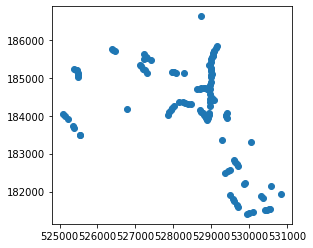

In [416]:
wifi.plot()

In [417]:
wifi = gpd.clip(wifi, CamHS)

In [418]:
# Spatial Joins
pointsInPolygon = gpd.sjoin(wifi, polygons, how="inner", op='intersects')

# Add a field with 1 as a constant value
pointsInPolygon['wifi']=1

# Group according to the column by which you want to aggregate data
pointsInPolygon = pointsInPolygon.groupby(['highstreet_name']).sum()

In [419]:
wifi_locations = pointsInPolygon[['wifi']]

In [420]:
CamHS = pd.merge(CamHS, wifi_locations, how = "outer", on= "highstreet_name")

In [421]:
CamHS

,objectid,highstreet,highstre_1,area_ha,gdb_geomat,layer,path,geometry,highstreet_name,public toilets,trees,bus_stops,train,streetlights,wifi
0,594,594,"Eversholt Street, Somers Town",6.303698,None,Eversholt,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529676.878 182864.075, 529679.937 18...",Eversholt,NaN,133,NaN,NaN,43,NaN
1,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,Cricklewood,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((523415.282 186284.726, 523422.134 18...",Cricklewood,NaN,62,14.0,NaN,17,NaN
2,372,372,"Fortune Green Road, Fortune Green.",6.581487,None,Fortune,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((525198.994 185637.081, 525201.838 18...",Fortune,NaN,99,5.0,NaN,39,NaN
3,285,285,"Fortress Road, Tufnell Park.",28.325719,None,Fortress,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529209.157 185757.682, 529206.506 18...",Fortress,3.0,290,17.0,1.0,257,27.0
4,303,303,"Belsize Lane, Belsize Park.",5.069615,None,Belsize,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526892.645 185059.806, 526900.890 18...",Belsize,NaN,33,NaN,NaN,41,NaN
5,287,287,Camden Town HS,56.349258,None,CamdenT,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528129.528 184489.100, 528138.350 18...",CamdenT,9.0,405,30.0,3.0,490,15.0
6,97,97,Brecknock Road & York Way.,15.327961,None,Brecknock,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529626.963 185290.470, 529619.385 18...",Brecknock,NaN,162,6.0,NaN,81,NaN
7,468,468,"Mansfield Road, Gospel Oak",3.508042,None,Mansfield,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528267.619 185602.755, 527975.356 18...",Mansfield,1.0,95,4.0,1.0,26,NaN
8,304,304,"Loudoun Road, South Hampstead.",8.078871,None,Loudoun,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526350.252 184351.109, 526360.006 18...",Loudoun,NaN,64,1.0,1.0,83,NaN
9,328,328,"Queen?s Crescent, Gospel Oak.",10.314779,None,Queens,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528422.038 185153.550, 528417.412 18...",Queens,2.0,193,3.0,NaN,96,5.0


### 5. Phone masts

In [422]:
masts = pd.read_csv('High Street Dimensions/Mobile_Phone_Masts_In_Camden_Map.csv')

In [423]:
masts = gpd.GeoDataFrame(masts, geometry = gpd.points_from_xy(masts['Easting'], masts['Northing'], crs="epsg:27700"))

<AxesSubplot:>

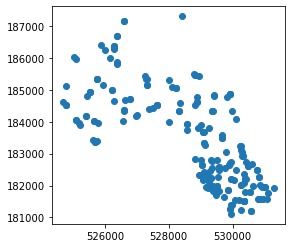

In [424]:
masts.plot()

In [425]:
masts = gpd.clip(masts, CamHS)

In [426]:
# Spatial Joins
pointsInPolygon = gpd.sjoin(masts, polygons, how="inner", op='intersects')

# Add a field with 1 as a constant value
pointsInPolygon['phone_masts']=1

# Group according to the column by which you want to aggregate data
pointsInPolygon = pointsInPolygon.groupby(['highstreet_name']).sum()

In [427]:
masts = pointsInPolygon[['phone_masts']]

In [428]:
CamHS = pd.merge(CamHS, masts, how = "outer", on= "highstreet_name")

***

### 6. Road lengths

In [429]:
belsizeroad = gpd.read_file('High Street Roads/belsizeroad.shp')

In [430]:
belsizeroad = belsizeroad.to_crs('EPSG:27700')

In [431]:
belsizeroad = belsizeroad['geometry'].length.values

In [432]:
belsizeroad

array([357.54817745])

In [433]:
CamHS['road_length'] = 0

In [434]:
CamHS['road_length'] = CamHS['road_length'].astype('float')

In [435]:
CamHS.loc[4, 'road_length'] = belsizeroad

In [436]:
CamHS

,objectid,highstreet,highstre_1,area_ha,gdb_geomat,layer,path,geometry,highstreet_name,public toilets,trees,bus_stops,train,streetlights,wifi,phone_masts,road_length
0,594,594,"Eversholt Street, Somers Town",6.303698,None,Eversholt,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529676.878 182864.075, 529679.937 18...",Eversholt,NaN,133,NaN,NaN,43,NaN,NaN,0.000000
1,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,Cricklewood,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((523415.282 186284.726, 523422.134 18...",Cricklewood,NaN,62,14.0,NaN,17,NaN,NaN,0.000000
2,372,372,"Fortune Green Road, Fortune Green.",6.581487,None,Fortune,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((525198.994 185637.081, 525201.838 18...",Fortune,NaN,99,5.0,NaN,39,NaN,NaN,0.000000
3,285,285,"Fortress Road, Tufnell Park.",28.325719,None,Fortress,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529209.157 185757.682, 529206.506 18...",Fortress,3.0,290,17.0,1.0,257,27.0,4.0,0.000000
4,303,303,"Belsize Lane, Belsize Park.",5.069615,None,Belsize,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526892.645 185059.806, 526900.890 18...",Belsize,NaN,33,NaN,NaN,41,NaN,NaN,357.548177
5,287,287,Camden Town HS,56.349258,None,CamdenT,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528129.528 184489.100, 528138.350 18...",CamdenT,9.0,405,30.0,3.0,490,15.0,7.0,0.000000
6,97,97,Brecknock Road & York Way.,15.327961,None,Brecknock,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529626.963 185290.470, 529619.385 18...",Brecknock,NaN,162,6.0,NaN,81,NaN,3.0,0.000000
7,468,468,"Mansfield Road, Gospel Oak",3.508042,None,Mansfield,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528267.619 185602.755, 527975.356 18...",Mansfield,1.0,95,4.0,1.0,26,NaN,NaN,0.000000
8,304,304,"Loudoun Road, South Hampstead.",8.078871,None,Loudoun,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526350.252 184351.109, 526360.006 18...",Loudoun,NaN,64,1.0,1.0,83,NaN,NaN,0.000000
9,328,328,"Queen?s Crescent, Gospel Oak.",10.314779,None,Queens,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528422.038 185153.550, 528417.412 18...",Queens,2.0,193,3.0,NaN,96,5.0,3.0,0.000000


In [437]:
brecknockroad = gpd.read_file('High Street Roads/brecknock.shp')

1. clip the boundary better to not cut off half the highstreet 
2. clip the roads to the length of the GLA shape to calculate the actual length - or use OS as a guideline

In [438]:
brecknockroad = brecknockroad.to_crs('EPSG:27700')

In [439]:
brecknockroad = brecknockroad['geometry'].length.values

In [440]:
brecknockroad = sum(brecknockroad)

In [441]:
brecknockroad

1508.4516917410833

In [442]:
CamHS.loc[0, 'road_length'] = brecknockroad

***

### 7. Parking Spaces

In [443]:
parking = pd.read_csv('High Street Dimensions/Parking_Bay_Map.csv')

In [444]:
parking = gpd.GeoDataFrame(parking, geometry = gpd.points_from_xy(parking['Longitude'], parking['Latitude'], crs="epsg:4326"))

<AxesSubplot:>

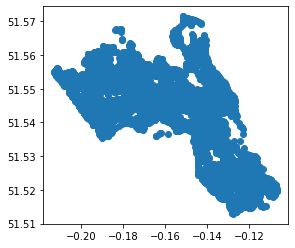

In [445]:
parking.plot()

In [446]:
parking = parking.to_crs('EPSG:27700')

In [447]:
parking = gpd.clip(parking, CamHS)

In [448]:
parking

,Restriction Type,Parking Spaces,Times Of Operation,Maximum Stay,Tariff,Cashless Identifier,Road Name,Postcode,Controlled Parking Zone,Valid Parking Permits,...,Easting,Northing,Longitude,Latitude,EPSG:27700 Well Known Text Geometry,EPSG:4326 Well Known Text Geometry,Spatial Accuracy,Last Uploaded,Location,geometry
6,resident permit holders only,2.0,"mon-fri 09:00-18:30, sat 09:30-13:30",NaN,NaN,NaN,Daleham Gardens,NW3 5DA,CA-B,CA-B,...,0,0,-0.173852,51.548465,NaN,NaN,Defined By Custodian,07/25/2021 11:02:00 PM,"(51.548465, -0.173852)",POINT (526718.976 184865.960)
19,permit holders only,9.0,mon-fri 08:30-18:30,NaN,NaN,NaN,Leverton Street,NW5 2NU,CA-M,CA-M,...,0,0,-0.139232,51.553155,NaN,NaN,Defined By Custodian,07/25/2021 11:02:00 PM,"(51.553155, -0.139232)",POINT (529106.017 185448.000)
27,permit holders only,1.0,mon-fri 08:30-18:30,NaN,NaN,NaN,Hilgrove Road,NW6 4TN,CA-K,CA-K,...,0,0,-0.178448,51.541721,NaN,NaN,Defined By Custodian,07/25/2021 11:02:01 PM,"(51.541721, -0.178448)",POINT (526418.995 184108.050)
28,bus cage,NaN,at any time,NaN,NaN,NaN,Malden Road,NW5 4JR,CA-L,NaN,...,527927,185154,-0.156309,51.550784,LINESTRING (527937.5989632533 185151.120298350...,LINESTRING (-0.15615761707400375 51.5507553026...,Defined By Custodian,07/25/2021 11:01:55 PM,"(51.550784, -0.156309)",POINT (527928.787 185154.354)
39,loading / paid-for,5.0,"mon-sun 08:30-10:00, 12:00-14:00, 16:00-23:00 ...",NaN,"£3.55 (non-diesel) / £4.31 (diesel),",13619.0,Crogsland Road,NW1 8AU,CA-F,NaN,...,0,0,-0.151887,51.544156,NaN,NaN,Defined By Custodian,07/25/2021 11:02:01 PM,"(51.544156, -0.151887)",POINT (528253.984 184425.028)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,resident permit holders only,3.0,mon-sat 09:00-20:00,NaN,NaN,NaN,Windmill Hill,NW3 6PZ,CA-H,CA-H,...,526259,185931,-0.180075,51.558142,LINESTRING (526248.5899516318 185940.004482601...,LINESTRING (-0.18022193126595287 51.5582250015...,Defined By Custodian,07/25/2021 11:01:59 PM,"(51.558142, -0.180075)",POINT (526260.740 185931.337)
8391,permit holders only,14.0,mon-fri 08:30-18:30,NaN,NaN,NaN,Quadrant Grove,NW5 4JN,CA-L,CA-L,...,0,0,-0.155629,51.550392,NaN,NaN,Defined By Custodian,07/25/2021 11:02:00 PM,"(51.550392, -0.155629)",POINT (527977.030 185111.951)
8392,paid-for / permit holders,6.0,mon-fri 08:30-18:30,2 hours,"£4.47 (non-diesel) / £5.43 (diesel),",13699.0,Gloucester Avenue,NW1 8JA,CA-J,CA-J,...,528040,184209,-0.155024,51.542266,LINESTRING (528037.9908272203 184235.742322570...,LINESTRING (-0.15504339053950353 51.5425061130...,Defined By Custodian,07/25/2021 11:01:58 PM,"(51.542266, -0.155024)",POINT (528041.766 184209.361)
8400,bus cage,NaN,at any time,NaN,NaN,NaN,South End Green,NW3 2LL,CA-H,NaN,...,527327,185537,-0.164819,51.554362,LINESTRING (527329.0887188088 185530.511698691...,LINESTRING (-0.16479205268411207 51.5543023238...,Defined By Custodian,07/25/2021 11:01:56 PM,"(51.554362, -0.164819)",POINT (527328.809 185537.408)


In [449]:
# Spatial Joins
pointsInPolygon = gpd.sjoin(parking, polygons, how="inner", op='intersects')

# Add a field with 1 as a constant value
pointsInPolygon['parking_locations']=1

# Group according to the column by which you want to aggregate data
pointsInPolygon = pointsInPolygon.groupby(['highstreet_name']).sum()

In [450]:
pointsInPolygon

,Parking Spaces,Cashless Identifier,Parking Bay Length Metres,Easting,Northing,Longitude,Latitude,index_right,objectid,highstreet,area_ha,public toilets,trees,bus_stops,train,parking_locations
highstreet_name,,,,,,,,,,,,,,,,
Belsize,120.0,68677.0,603.815,20019803,7026766,-7.230083,2165.052694,168,12726,12726,212.923823,0.0,1386,0.0,0.0,42
Brecknock,249.0,106077.0,1264.735,21188645,7402829,-7.027147,2783.656247,324,5238,5238,827.709877,0.0,8748,324.0,0.0,54
CamdenT,794.0,945741.0,4948.260,103121021,35855764,-35.764237,12781.747544,1240,71176,71176,13974.615887,2232.0,100440,7440.0,744.0,248
Cricklewood,125.0,118796.0,674.000,16247167,5747806,-6.763520,1649.727613,32,10304,10304,906.843499,0.0,1984,448.0,0.0,32
Eversholt,124.0,163997.0,673.370,22777300,7861823,-6.445409,2524.947233,0,29106,29106,308.881197,0.0,6517,0.0,0.0,49
Fortress,431.0,452044.0,2582.895,53960124,18882874,-17.006394,6237.578155,363,34485,34485,3427.411971,363.0,35090,2057.0,121.0,121
Fortune,121.0,105695.0,763.000,15228818,5382483,-6.089382,1598.216244,62,11532,11532,204.026106,0.0,3069,155.0,0.0,31
Hampstead,376.0,513307.0,1997.190,57390066,20243800,-21.170331,6186.759635,1440,66480,66480,2161.886923,0.0,19680,840.0,120.0,120
Haverstock,115.0,82608.0,746.000,16874289,5922817,-5.946515,1855.814192,396,11016,11016,254.675969,0.0,3456,144.0,36.0,36


In [451]:
parking_availability = pointsInPolygon[['Parking Spaces', 'parking_locations']]

In [452]:
CamHS = pd.merge(CamHS, parking_availability, how = "outer", on= "highstreet_name")

In [453]:
CamHS

,objectid,highstreet,highstre_1,area_ha,gdb_geomat,layer,path,geometry,highstreet_name,public toilets,trees,bus_stops,train,streetlights,wifi,phone_masts,road_length,Parking Spaces,parking_locations
0,594,594,"Eversholt Street, Somers Town",6.303698,None,Eversholt,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529676.878 182864.075, 529679.937 18...",Eversholt,NaN,133,NaN,NaN,43,NaN,NaN,1508.451692,124.0,49
1,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,Cricklewood,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((523415.282 186284.726, 523422.134 18...",Cricklewood,NaN,62,14.0,NaN,17,NaN,NaN,0.000000,125.0,32
2,372,372,"Fortune Green Road, Fortune Green.",6.581487,None,Fortune,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((525198.994 185637.081, 525201.838 18...",Fortune,NaN,99,5.0,NaN,39,NaN,NaN,0.000000,121.0,31
3,285,285,"Fortress Road, Tufnell Park.",28.325719,None,Fortress,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529209.157 185757.682, 529206.506 18...",Fortress,3.0,290,17.0,1.0,257,27.0,4.0,0.000000,431.0,121
4,303,303,"Belsize Lane, Belsize Park.",5.069615,None,Belsize,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526892.645 185059.806, 526900.890 18...",Belsize,NaN,33,NaN,NaN,41,NaN,NaN,357.548177,120.0,42
5,287,287,Camden Town HS,56.349258,None,CamdenT,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528129.528 184489.100, 528138.350 18...",CamdenT,9.0,405,30.0,3.0,490,15.0,7.0,0.000000,794.0,248
6,97,97,Brecknock Road & York Way.,15.327961,None,Brecknock,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529626.963 185290.470, 529619.385 18...",Brecknock,NaN,162,6.0,NaN,81,NaN,3.0,0.000000,249.0,54
7,468,468,"Mansfield Road, Gospel Oak",3.508042,None,Mansfield,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528267.619 185602.755, 527975.356 18...",Mansfield,1.0,95,4.0,1.0,26,NaN,NaN,0.000000,52.0,22
8,304,304,"Loudoun Road, South Hampstead.",8.078871,None,Loudoun,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526350.252 184351.109, 526360.006 18...",Loudoun,NaN,64,1.0,1.0,83,NaN,NaN,0.000000,244.0,61
9,328,328,"Queen?s Crescent, Gospel Oak.",10.314779,None,Queens,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528422.038 185153.550, 528417.412 18...",Queens,2.0,193,3.0,NaN,96,5.0,3.0,0.000000,287.0,67


### 8. Train usage

In [454]:
train

,osm_id,code,fclass,name,geometry
19013,1670707917,5601,railway_station,Camden Town,POINT (528904.889 183915.357)
19016,1670707975,5601,railway_station,Tufnell Park,POINT (529149.427 185854.763)
19890,5182424563,5601,railway_station,Mornington Crescent,POINT (529239.107 183326.657)
19908,5183760375,5601,railway_station,Finchley Road,POINT (526247.846 184716.875)
20047,5482891928,5601,railway_station,Hampstead,POINT (526379.387 185762.406)
20048,5482891929,5601,railway_station,Belsize Park,POINT (527354.289 185087.029)
20052,5489114067,5601,railway_station,Swiss Cottage,POINT (526653.789 184336.561)
20113,5585857405,5601,railway_station,Chalk Farm,POINT (528143.567 184417.577)
20557,6404031521,5601,railway_station,West Hampstead,POINT (525606.365 184655.195)
20580,6436648511,5601,railway_station,Kilburn,POINT (524539.940 184647.780)


In [455]:
train_use = pd.read_excel('https://data.london.gov.uk/download/train-station-usage/b23a39a1-f387-43ba-950a-19d1cfd8aab6/station-usage.xlsx', sheet_name = '2018-19')

In [456]:
train_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   NLC                                          2566 non-null   int64 
 1   TLC                                          2566 non-null   object
 2   Station Name                                 2566 non-null   object
 3   Region                                       2566 non-null   object
 4   Local Authority                              2566 non-null   object
 5   Constituency                                 2566 non-null   object
 6   NUTS2 Spatial Unit                           2566 non-null   object
 7   NUTS2 Spatial_Unit Code                      2566 non-null   object
 8   OS Grid Easting                              2566 non-null   int64 
 9   OS Grid Northing                             2566 non-null   int64 
 10  Station Faci

In [457]:
#train_usage = pd.merge(train, train_use, how = "outer", on= "name")

### Food Hygiene

In [458]:
#food_hygiene = pd.read_csv('High Street Dimensions/Food_Hygiene_Rating_Scheme_Camden.csv')

In [459]:
#food_hygiene = food_hygiene.dropna(subset=['Easting', 'Northing'])

In [460]:
#food_hygiene = gpd.GeoDataFrame(food_hygiene, geometry = gpd.points_from_xy(food_hygiene['Easting'], food_hygiene['Northing'], crs="epsg:27700"))

In [461]:
#food_hygiene.plot()

In [462]:
#food_hygiene['Rating Value'].unique()

In [463]:
#no_rating = ['AwaitingInspection', 'Exempt', 'AwaitingPublication']

In [464]:
#food_hygiene1 = food_hygiene[(food_hygiene['Rating Value'] >= 0) & (food_hygiene['Rating Value'] <= 5)]

In [465]:
#food_hygiene['Rating Value'] = food_hygiene[food_hygiene['Rating Value'].astype('str').str.isnumeric()]

In [466]:
#food_hygiene['Rating Value']

In [467]:
#hygiene = gpd.clip(food_hygiene1, CamHS)

In [468]:
#hygiene.plot()

In [469]:
#hygiene['Business Type Description'] = hygiene['Business Type Description'].astype('category')

In [470]:
# Spatial Joins
#pointsInPolygon = gpd.sjoin(hygiene, polygons, how="inner", op='intersects')

# Group according to the column by which you want to aggregate data
#pointsInPolygon = pointsInPolygon.groupby(['highstreet_name']).sum()

In [471]:
#pointsInPolygon

In [472]:
#masts = pointsInPolygon[['phone_masts']]

In [473]:
#CamHS = pd.merge(CamHS, masts, how = "outer", on= "highstreet_name")

Create average scores by type for each high street

or dummy variable the scores from 0-5 and count like that

In [474]:
food_hygiene_v2 = pd.read_csv('High Street Dimensions/Food_Hygiene_Rating_Scheme_Camden_refined.csv')

In [475]:
food_hygiene_v2 = gpd.GeoDataFrame(food_hygiene_v2, geometry = gpd.points_from_xy(food_hygiene_v2['Easting'], food_hygiene_v2['Northing'], crs="epsg:27700"))

In [476]:
food_hygiene_v2['Business Type ID'] = food_hygiene_v2['Business Type ID'].astype('category')

In [477]:
food_hygiene_v2['Rating Value'] = food_hygiene_v2['Rating Value'].astype('category')

In [478]:
rating_dummies = pd.get_dummies(food_hygiene_v2['Rating Value'])

In [479]:
rating_dummies

,0,1,2,3,4,5
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
2889,0,0,0,0,1,0
2890,0,0,0,0,1,0
2891,0,0,0,0,1,0
2892,0,0,0,0,0,1


In [480]:
food_hygiene = pd.concat([food_hygiene_v2, rating_dummies], axis=1)

In [481]:
food_hygiene = gpd.clip(food_hygiene, CamHS)

In [482]:
food_hygiene

,Business Name,Address Line 1,Address Line 2,Address Line 3,Postcode,Business Type ID,Business Type Description,Food Hygiene Rating Scheme ID,Food Hygiene Rating Scheme Type,Hygiene Score,...,Last Uploaded,Location,Organisation URI,geometry,0,1,2,3,4,5
0,Raks News,NaN,7 Quex Road,NaN,NW6 4PP,4613,Retailers - other,425186,FHRS,0.0,...,25/07/2021,"(51.540065, -0.195072)",http://opendatacommunities.org/id/london-borou...,POINT (525270.000 183896.000),0,0,0,0,1,0
1,Cafe Palestina,NaN,53 Fortess Road,NaN,NW5 1AD,1,Restaurant/Cafe/Canteen,1045543,FHRS,10.0,...,25/07/2021,"(51.554053, -0.140669)",http://opendatacommunities.org/id/london-borou...,POINT (529003.000 185546.000),0,0,0,1,0,0
3,Tex Ann,NaN,178 Kilburn High Road,NaN,NW6 4JD,4613,Retailers - other,1174673,FHRS,10.0,...,25/07/2021,"(51.540958, -0.19645)",http://opendatacommunities.org/id/london-borou...,POINT (525172.000 183992.000),0,0,0,1,0,0
4,Roniâ€™s Bakery,NaN,37 Belsize Lane,NaN,NW3 5AS,1,Restaurant/Cafe/Canteen,583255,FHRS,10.0,...,25/07/2021,"(51.549492, -0.170996)",http://opendatacommunities.org/id/london-borou...,POINT (526913.000 184985.000),0,0,0,1,0,0
6,Greggs,NaN,311 Kentish Town Road,NaN,NW5 2TJ,7844,Takeaway/sandwich shop,423907,FHRS,5.0,...,25/07/2021,"(51.549744, -0.141134)",http://opendatacommunities.org/id/london-borou...,POINT (528983.000 185066.000),0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2879,Hilal Food Centre,NaN,322-324 Kilburn High Road,NaN,NW6 2QN,4613,Retailers - other,947365,FHRS,15.0,...,25/07/2021,"(51.545168, -0.201173)",http://opendatacommunities.org/id/london-borou...,POINT (524833.000 184452.000),0,0,1,0,0,0
2883,Highlander,Inverness Street Market,Inverness Street,NaN,NW1 7HJ,7844,Takeaway/sandwich shop,1181618,FHRS,5.0,...,25/07/2021,"(51.539639, -0.144113)",http://opendatacommunities.org/id/london-borou...,POINT (528805.000 183937.000),0,0,0,0,0,1
2885,Caffe Nero,NaN,264-266 West End Lane,NaN,NW6 1LJ,1,Restaurant/Cafe/Canteen,426213,FHRS,5.0,...,25/07/2021,"(51.551793, -0.191724)",http://opendatacommunities.org/id/london-borou...,POINT (525469.000 185205.000),0,0,0,0,1,0
2887,Nando's Chickenland Ltd,NaN,57-58 Chalk Farm Road,NaN,NW1 8AN,1,Restaurant/Cafe/Canteen,425342,FHRS,5.0,...,25/07/2021,"(51.543415, -0.149771)",http://opendatacommunities.org/id/london-borou...,POINT (528402.000 184346.000),0,0,0,0,0,1


In [483]:
# Spatial Joins
pointsInPolygon = gpd.sjoin(food_hygiene, polygons, how="inner", op='intersects')

# Group according to the column by which you want to aggregate data
pointsInPolygon = pointsInPolygon.groupby(['highstreet_name']).sum()

In [484]:
pointsInPolygon

,Address Line 3,Food Hygiene Rating Scheme ID,Hygiene Score,Structural Score,Confidence In Management Score,New Rating Pending,Local Authority Business ID,Local Authority Code,Easting,Northing,...,4,5,index_right,objectid,highstreet,area_ha,public toilets,trees,bus_stops,train
highstreet_name,,,,,,,,,,,,,,,,,,,,,
Belsize,0.0,9286383,75.0,85.0,85.0,0,1074257,7084,7376130,2589373,...,7,5,56,4242,4242,70.974608,0.0,462,0.0,0.0
Brecknock,0.0,11501845,80.0,110.0,110.0,0,1218666,9108,9535600,3329920,...,7,7,108,1746,1746,275.903292,0.0,2916,108.0,0.0
CamdenT,0.0,329289027,1940.0,2535.0,2480.0,0,49253537,185702,194061684,67506263,...,85,160,1835,105329,105329,20680.177542,3303.0,148635,11010.0,1101.0
Cricklewood,0.0,10740650,80.0,90.0,95.0,0,1608277,6578,6812914,2410458,...,1,6,13,4186,4186,368.405171,0.0,806,182.0,0.0
Eversholt,0.0,16041736,120.0,100.0,125.0,0,1996365,10626,11124117,3839135,...,2,13,0,12474,12474,132.377656,0.0,2793,0.0,0.0
Fortress,0.0,93088723,630.0,775.0,775.0,0,13150866,61226,64010434,22399861,...,28,51,363,34485,34485,3427.411971,363.0,35090,2057.0,121.0
Fortune,0.0,10161259,65.0,70.0,90.0,0,1557001,5566,5776473,2041664,...,2,5,22,4092,4092,72.396360,0.0,1089,55.0,0.0
Hampstead,0.0,54655308,325.0,435.0,375.0,0,6865054,36938,38431239,13559651,...,17,42,876,40442,40442,1315.147878,0.0,11972,511.0,73.0
Haverstock,0.0,19404383,130.0,225.0,160.0,1,2367780,14168,14763802,5184508,...,6,14,308,8568,8568,198.081309,0.0,2688,112.0,28.0


In [485]:
food_scores = pointsInPolygon[[1, 2, 3, 4, 5]]

In [486]:
food_scores

,1,2,3,4,5
highstreet_name,,,,,
Belsize,0,0,2,7,5
Brecknock,1,0,3,7,7
CamdenT,27,23,71,85,160
Cricklewood,0,0,6,1,6
Eversholt,1,1,4,2,13
Fortress,3,4,35,28,51
Fortune,1,0,3,2,5
Hampstead,2,5,7,17,42
Haverstock,1,3,4,6,14


In [487]:
CamHS = pd.merge(CamHS, food_scores, how = "outer", on= "highstreet_name")

In [488]:
CamHS

,objectid,highstreet,highstre_1,area_ha,gdb_geomat,layer,path,geometry,highstreet_name,public toilets,...,wifi,phone_masts,road_length,Parking Spaces,parking_locations,1,2,3,4,5
0,594,594,"Eversholt Street, Somers Town",6.303698,None,Eversholt,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529676.878 182864.075, 529679.937 18...",Eversholt,NaN,...,NaN,NaN,1508.451692,124.0,49,1,1,4,2,13
1,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,Cricklewood,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((523415.282 186284.726, 523422.134 18...",Cricklewood,NaN,...,NaN,NaN,0.000000,125.0,32,0,0,6,1,6
2,372,372,"Fortune Green Road, Fortune Green.",6.581487,None,Fortune,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((525198.994 185637.081, 525201.838 18...",Fortune,NaN,...,NaN,NaN,0.000000,121.0,31,1,0,3,2,5
3,285,285,"Fortress Road, Tufnell Park.",28.325719,None,Fortress,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529209.157 185757.682, 529206.506 18...",Fortress,3.0,...,27.0,4.0,0.000000,431.0,121,3,4,35,28,51
4,303,303,"Belsize Lane, Belsize Park.",5.069615,None,Belsize,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526892.645 185059.806, 526900.890 18...",Belsize,NaN,...,NaN,NaN,357.548177,120.0,42,0,0,2,7,5
5,287,287,Camden Town HS,56.349258,None,CamdenT,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528129.528 184489.100, 528138.350 18...",CamdenT,9.0,...,15.0,7.0,0.000000,794.0,248,27,23,71,85,160
6,97,97,Brecknock Road & York Way.,15.327961,None,Brecknock,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529626.963 185290.470, 529619.385 18...",Brecknock,NaN,...,NaN,3.0,0.000000,249.0,54,1,0,3,7,7
7,468,468,"Mansfield Road, Gospel Oak",3.508042,None,Mansfield,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528267.619 185602.755, 527975.356 18...",Mansfield,1.0,...,NaN,NaN,0.000000,52.0,22,1,1,1,2,3
8,304,304,"Loudoun Road, South Hampstead.",8.078871,None,Loudoun,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526350.252 184351.109, 526360.006 18...",Loudoun,NaN,...,NaN,NaN,0.000000,244.0,61,0,5,1,3,3
9,328,328,"Queen?s Crescent, Gospel Oak.",10.314779,None,Queens,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528422.038 185153.550, 528417.412 18...",Queens,2.0,...,5.0,3.0,0.000000,287.0,67,6,4,11,7,7


### Food hygiene data - type 

In [489]:
food_hygiene = pd.read_csv('High Street Dimensions/Food_Hygiene_Rating_Scheme_Camden.csv')

In [490]:
food_hygiene = food_hygiene.dropna(subset=['Easting', 'Northing'])

In [491]:
food_hygiene = gpd.GeoDataFrame(food_hygiene, geometry = gpd.points_from_xy(food_hygiene['Easting'], food_hygiene['Northing'], crs="epsg:27700"))

In [492]:
business_dummies = pd.get_dummies(food_hygiene['Business Type Description'])

In [493]:
business_dummies

,Distributors/Transporters,Hospitals/Childcare/Caring Premises,Hotel/bed & breakfast/guest house,Importers/Exporters,Manufacturers/packers,Mobile caterer,Other catering premises,Pub/bar/nightclub,Restaurant/Cafe/Canteen,Retailers - other,Retailers - supermarkets/hypermarkets,School/college/university,Takeaway/sandwich shop
10,0,0,0,0,0,0,0,0,0,1,0,0,0
14,0,0,0,0,0,0,0,0,1,0,0,0,0
19,0,0,0,0,0,0,0,0,1,0,0,0,0
32,0,0,0,0,0,0,0,0,0,1,0,0,0
38,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3786,0,0,0,0,0,0,0,0,0,1,0,0,0
3787,0,0,0,0,0,0,0,0,1,0,0,0,0
3788,0,0,0,0,0,0,0,0,1,0,0,0,0
3789,0,0,0,0,0,0,0,1,0,0,0,0,0


In [494]:
food_hygiene3 = pd.concat([food_hygiene, business_dummies], axis=1)

In [495]:
food_hygiene3 = gpd.clip(food_hygiene3, CamHS)

In [496]:
# Spatial Joins
pointsInPolygon = gpd.sjoin(food_hygiene3, polygons, how="inner", op='intersects')

# Group according to the column by which you want to aggregate data
pointsInPolygon = pointsInPolygon.groupby(['highstreet_name']).sum()

In [497]:
pointsInPolygon

,Business Type ID,Food Hygiene Rating Scheme ID,Hygiene Score,Structural Score,Confidence In Management Score,New Rating Pending,Local Authority Business ID,Local Authority Code,Easting,Northing,...,School/college/university,Takeaway/sandwich shop,index_right,objectid,highstreet,area_ha,public toilets,trees,bus_stops,train
highstreet_name,,,,,,,,,,,,,,,,,,,,,
Belsize,46604,12325684,75.0,85.0,85.0,0,1492254,8602,8956795.0,3144205.0,...,0,2,68,5151,5151,86.183452,0.0,561,0.0,0.0
Brecknock,125955,19756117,80.0,110.0,110.0,1,2426594,12650,13244003.0,4625107.0,...,3,3,150,2425,2425,383.199017,0.0,4050,150.0,0.0
CamdenT,2225836,448072546,1940.0,2535.0,2480.0,11,66603633,232760,243234956.0,84619000.0,...,2,182,2300,132020,132020,25920.658500,4140.0,186300,13800.0,1380.0
Cricklewood,51216,12909100,80.0,90.0,95.0,0,1862780,8096,8385231.0,2966580.0,...,0,2,16,5152,5152,453.421749,0.0,992,224.0,0.0
Eversholt,85822,19902648,120.0,100.0,125.0,0,2589580,12144,12713492.0,4387458.0,...,1,3,0,14256,14256,151.288750,0.0,3192,0.0,0.0
Fortress,564753,129491124,630.0,775.0,775.0,0,18487188,76912,80409916.0,28138848.0,...,1,31,456,43320,43320,4305.509253,456.0,44080,2584.0,152.0
Fortune,23543,12680303,65.0,70.0,90.0,0,1953742,6578,6826783.0,2412988.0,...,1,1,26,4836,4836,85.559335,0.0,1287,65.0,0.0
Hampstead,293014,72249215,325.0,435.0,375.0,0,9282325,44528,46327959.0,16346610.0,...,3,14,1056,48752,48752,1585.383744,0.0,14432,616.0,88.0
Haverstock,104281,27435311,130.0,225.0,160.0,1,3498002,17710,18454701.0,6480802.0,...,1,3,385,10710,10710,247.601637,0.0,3360,140.0,35.0


In [498]:
heading = list(food_hygiene_v2['Business Type Description'].unique())

In [499]:
heading

['Retailers - other',
 'Restaurant/Cafe/Canteen',
 'Takeaway/sandwich shop',
 'Hotel/bed & breakfast/guest house',
 'Retailers - supermarkets/hypermarkets',
 'Hospitals/Childcare/Caring Premises',
 'Pub/bar/nightclub',
 'School/college/university',
 'Other catering premises',
 'Mobile caterer',
 'Manufacturers/packers',
 'Distributors/Transporters']

In [500]:
food_types = pointsInPolygon[heading]

In [501]:
food_types

,Retailers - other,Restaurant/Cafe/Canteen,Takeaway/sandwich shop,Hotel/bed & breakfast/guest house,Retailers - supermarkets/hypermarkets,Hospitals/Childcare/Caring Premises,Pub/bar/nightclub,School/college/university,Other catering premises,Mobile caterer,Manufacturers/packers,Distributors/Transporters
highstreet_name,,,,,,,,,,,,
Belsize,5,9,2,1,0,0,0,0,0,0,0,0
Brecknock,12,4,3,1,0,0,2,3,0,0,0,0
CamdenT,71,144,182,7,9,2,40,2,1,0,1,1
Cricklewood,6,7,2,0,0,0,1,0,0,0,0,0
Eversholt,5,11,3,1,0,0,2,1,1,0,0,0
Fortress,34,65,31,0,6,1,10,1,3,0,1,0
Fortune,0,9,1,0,1,1,0,1,0,0,0,0
Hampstead,21,40,14,0,1,2,5,3,0,1,1,0
Haverstock,9,18,3,0,1,0,3,1,0,0,0,0


In [502]:
CamHS = pd.merge(CamHS, food_types, how = "outer", on= "highstreet_name")

In [503]:
CamHS

,objectid,highstreet,highstre_1,area_ha,gdb_geomat,layer,path,geometry,highstreet_name,public toilets,...,Takeaway/sandwich shop,Hotel/bed & breakfast/guest house,Retailers - supermarkets/hypermarkets,Hospitals/Childcare/Caring Premises,Pub/bar/nightclub,School/college/university,Other catering premises,Mobile caterer,Manufacturers/packers,Distributors/Transporters
0,594,594,"Eversholt Street, Somers Town",6.303698,None,Eversholt,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529676.878 182864.075, 529679.937 18...",Eversholt,NaN,...,3,1,0,0,2,1,1,0,0,0
1,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,Cricklewood,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((523415.282 186284.726, 523422.134 18...",Cricklewood,NaN,...,2,0,0,0,1,0,0,0,0,0
2,372,372,"Fortune Green Road, Fortune Green.",6.581487,None,Fortune,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((525198.994 185637.081, 525201.838 18...",Fortune,NaN,...,1,0,1,1,0,1,0,0,0,0
3,285,285,"Fortress Road, Tufnell Park.",28.325719,None,Fortress,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529209.157 185757.682, 529206.506 18...",Fortress,3.0,...,31,0,6,1,10,1,3,0,1,0
4,303,303,"Belsize Lane, Belsize Park.",5.069615,None,Belsize,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526892.645 185059.806, 526900.890 18...",Belsize,NaN,...,2,1,0,0,0,0,0,0,0,0
5,287,287,Camden Town HS,56.349258,None,CamdenT,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528129.528 184489.100, 528138.350 18...",CamdenT,9.0,...,182,7,9,2,40,2,1,0,1,1
6,97,97,Brecknock Road & York Way.,15.327961,None,Brecknock,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529626.963 185290.470, 529619.385 18...",Brecknock,NaN,...,3,1,0,0,2,3,0,0,0,0
7,468,468,"Mansfield Road, Gospel Oak",3.508042,None,Mansfield,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528267.619 185602.755, 527975.356 18...",Mansfield,1.0,...,2,0,0,0,1,1,0,0,0,0
8,304,304,"Loudoun Road, South Hampstead.",8.078871,None,Loudoun,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526350.252 184351.109, 526360.006 18...",Loudoun,NaN,...,2,0,1,1,1,0,1,0,0,0
9,328,328,"Queen?s Crescent, Gospel Oak.",10.314779,None,Queens,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528422.038 185153.550, 528417.412 18...",Queens,2.0,...,7,0,0,0,4,0,1,0,0,0


### Markets and Kiosks

In [504]:
kiosks = pd.read_csv('High Street Dimensions/Camden_Markets_And_Kiosks (1).csv')

In [505]:
CamHS.to_csv('highstreet dimensions 1st Sep.csv')

***

### CLUSTER ANALYSIS

In [506]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
import mapclassify as mc
import pysal as p
import palettable.matplotlib as palmpl
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette

In [507]:
CamHS.head()

,objectid,highstreet,highstre_1,area_ha,gdb_geomat,layer,path,geometry,highstreet_name,public toilets,...,Takeaway/sandwich shop,Hotel/bed & breakfast/guest house,Retailers - supermarkets/hypermarkets,Hospitals/Childcare/Caring Premises,Pub/bar/nightclub,School/college/university,Other catering premises,Mobile caterer,Manufacturers/packers,Distributors/Transporters
0,594,594,"Eversholt Street, Somers Town",6.303698,None,Eversholt,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529676.878 182864.075, 529679.937 18...",Eversholt,NaN,...,3,1,0,0,2,1,1,0,0,0
1,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,Cricklewood,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((523415.282 186284.726, 523422.134 18...",Cricklewood,NaN,...,2,0,0,0,1,0,0,0,0,0
2,372,372,"Fortune Green Road, Fortune Green.",6.581487,None,Fortune,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((525198.994 185637.081, 525201.838 18...",Fortune,NaN,...,1,0,1,1,0,1,0,0,0,0
3,285,285,"Fortress Road, Tufnell Park.",28.325719,None,Fortress,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529209.157 185757.682, 529206.506 18...",Fortress,3.0,...,31,0,6,1,10,1,3,0,1,0
4,303,303,"Belsize Lane, Belsize Park.",5.069615,None,Belsize,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526892.645 185059.806, 526900.890 18...",Belsize,NaN,...,2,1,0,0,0,0,0,0,0,0


In [508]:
CamHS = CamHS.sort_values(by=['highstreet_name'])

In [509]:
CamHS

,objectid,highstreet,highstre_1,area_ha,gdb_geomat,layer,path,geometry,highstreet_name,public toilets,...,Takeaway/sandwich shop,Hotel/bed & breakfast/guest house,Retailers - supermarkets/hypermarkets,Hospitals/Childcare/Caring Premises,Pub/bar/nightclub,School/college/university,Other catering premises,Mobile caterer,Manufacturers/packers,Distributors/Transporters
4,303,303,"Belsize Lane, Belsize Park.",5.069615,None,Belsize,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526892.645 185059.806, 526900.890 18...",Belsize,NaN,...,2,1,0,0,0,0,0,0,0,0
6,97,97,Brecknock Road & York Way.,15.327961,None,Brecknock,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529626.963 185290.470, 529619.385 18...",Brecknock,NaN,...,3,1,0,0,2,3,0,0,0,0
5,287,287,Camden Town HS,56.349258,None,CamdenT,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528129.528 184489.100, 528138.350 18...",CamdenT,9.0,...,182,7,9,2,40,2,1,0,1,1
1,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,Cricklewood,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((523415.282 186284.726, 523422.134 18...",Cricklewood,NaN,...,2,0,0,0,1,0,0,0,0,0
0,594,594,"Eversholt Street, Somers Town",6.303698,None,Eversholt,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529676.878 182864.075, 529679.937 18...",Eversholt,NaN,...,3,1,0,0,2,1,1,0,0,0
3,285,285,"Fortress Road, Tufnell Park.",28.325719,None,Fortress,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529209.157 185757.682, 529206.506 18...",Fortress,3.0,...,31,0,6,1,10,1,3,0,1,0
2,372,372,"Fortune Green Road, Fortune Green.",6.581487,None,Fortune,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((525198.994 185637.081, 525201.838 18...",Fortune,NaN,...,1,0,1,1,0,1,0,0,0,0
12,554,554,"Hampstead High Street, Hampstead.",18.015724,None,Hampstead,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526487.202 186045.854, 526489.502 18...",Hampstead,NaN,...,14,0,1,2,5,3,0,1,1,0
11,306,306,"Haverstock Hill, Belsize Park.",7.074332,None,Haverstock,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((527238.261 185262.468, 527237.189 18...",Haverstock,NaN,...,3,0,1,0,3,1,0,0,0,0
14,98,98,Kentish Town Road.,11.453950,None,Kentish,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529169.048 184315.559, 529169.180 18...",Kentish,NaN,...,15,1,0,1,6,0,0,0,0,2


drop Finchley and Highgate High 

In [510]:
CamHS.drop(CamHS.loc[CamHS['objectid']==374].index, inplace=True)

In [511]:
CamHS.drop(CamHS.loc[CamHS['objectid']==319].index, inplace=True)

In [512]:
CamHS

,objectid,highstreet,highstre_1,area_ha,gdb_geomat,layer,path,geometry,highstreet_name,public toilets,...,Takeaway/sandwich shop,Hotel/bed & breakfast/guest house,Retailers - supermarkets/hypermarkets,Hospitals/Childcare/Caring Premises,Pub/bar/nightclub,School/college/university,Other catering premises,Mobile caterer,Manufacturers/packers,Distributors/Transporters
4,303,303,"Belsize Lane, Belsize Park.",5.069615,None,Belsize,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526892.645 185059.806, 526900.890 18...",Belsize,NaN,...,2,1,0,0,0,0,0,0,0,0
6,97,97,Brecknock Road & York Way.,15.327961,None,Brecknock,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529626.963 185290.470, 529619.385 18...",Brecknock,NaN,...,3,1,0,0,2,3,0,0,0,0
5,287,287,Camden Town HS,56.349258,None,CamdenT,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528129.528 184489.100, 528138.350 18...",CamdenT,9.0,...,182,7,9,2,40,2,1,0,1,1
1,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,Cricklewood,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((523415.282 186284.726, 523422.134 18...",Cricklewood,NaN,...,2,0,0,0,1,0,0,0,0,0
0,594,594,"Eversholt Street, Somers Town",6.303698,None,Eversholt,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529676.878 182864.075, 529679.937 18...",Eversholt,NaN,...,3,1,0,0,2,1,1,0,0,0
3,285,285,"Fortress Road, Tufnell Park.",28.325719,None,Fortress,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529209.157 185757.682, 529206.506 18...",Fortress,3.0,...,31,0,6,1,10,1,3,0,1,0
2,372,372,"Fortune Green Road, Fortune Green.",6.581487,None,Fortune,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((525198.994 185637.081, 525201.838 18...",Fortune,NaN,...,1,0,1,1,0,1,0,0,0,0
12,554,554,"Hampstead High Street, Hampstead.",18.015724,None,Hampstead,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526487.202 186045.854, 526489.502 18...",Hampstead,NaN,...,14,0,1,2,5,3,0,1,1,0
11,306,306,"Haverstock Hill, Belsize Park.",7.074332,None,Haverstock,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((527238.261 185262.468, 527237.189 18...",Haverstock,NaN,...,3,0,1,0,3,1,0,0,0,0
14,98,98,Kentish Town Road.,11.453950,None,Kentish,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529169.048 184315.559, 529169.180 18...",Kentish,NaN,...,15,1,0,1,6,0,0,0,0,2


In [513]:
cam_cols = print(list(CamHS))

['objectid', 'highstreet', 'highstre_1', 'area_ha', 'gdb_geomat', 'layer', 'path', 'geometry', 'highstreet_name', 'public toilets', 'trees', 'bus_stops', 'train', 'streetlights', 'wifi', 'phone_masts', 'road_length', 'Parking Spaces', 'parking_locations', 1, 2, 3, 4, 5, 'Retailers - other', 'Restaurant/Cafe/Canteen', 'Takeaway/sandwich shop', 'Hotel/bed & breakfast/guest house', 'Retailers - supermarkets/hypermarkets', 'Hospitals/Childcare/Caring Premises', 'Pub/bar/nightclub', 'School/college/university', 'Other catering premises', 'Mobile caterer', 'Manufacturers/packers', 'Distributors/Transporters']


In [514]:
CamHS.isnull().sum(axis=0).sort_values(ascending=False)[:8]

gdb_geomat                   19
public toilets               12
phone_masts                  10
wifi                          9
train                         9
bus_stops                     4
Distributors/Transporters     0
streetlights                  0
dtype: int64

In [515]:
#CamHS = CamHS.drop(['gdb_geomattr_data'], axis=1) 

In [516]:
CamHS = CamHS.fillna(0)

In [517]:
CamHS.isnull().sum(axis=0).sort_values(ascending=False)[:12]

Distributors/Transporters    0
Manufacturers/packers        0
phone_masts                  0
wifi                         0
streetlights                 0
train                        0
bus_stops                    0
trees                        0
public toilets               0
highstreet_name              0
geometry                     0
path                         0
dtype: int64

In [518]:
CamHS

,objectid,highstreet,highstre_1,area_ha,gdb_geomat,layer,path,geometry,highstreet_name,public toilets,...,Takeaway/sandwich shop,Hotel/bed & breakfast/guest house,Retailers - supermarkets/hypermarkets,Hospitals/Childcare/Caring Premises,Pub/bar/nightclub,School/college/university,Other catering premises,Mobile caterer,Manufacturers/packers,Distributors/Transporters
4,303,303,"Belsize Lane, Belsize Park.",5.069615,0,Belsize,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526892.645 185059.806, 526900.890 18...",Belsize,0.0,...,2,1,0,0,0,0,0,0,0,0
6,97,97,Brecknock Road & York Way.,15.327961,0,Brecknock,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529626.963 185290.470, 529619.385 18...",Brecknock,0.0,...,3,1,0,0,2,3,0,0,0,0
5,287,287,Camden Town HS,56.349258,0,CamdenT,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528129.528 184489.100, 528138.350 18...",CamdenT,9.0,...,182,7,9,2,40,2,1,0,1,1
1,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,0,Cricklewood,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((523415.282 186284.726, 523422.134 18...",Cricklewood,0.0,...,2,0,0,0,1,0,0,0,0,0
0,594,594,"Eversholt Street, Somers Town",6.303698,0,Eversholt,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529676.878 182864.075, 529679.937 18...",Eversholt,0.0,...,3,1,0,0,2,1,1,0,0,0
3,285,285,"Fortress Road, Tufnell Park.",28.325719,0,Fortress,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529209.157 185757.682, 529206.506 18...",Fortress,3.0,...,31,0,6,1,10,1,3,0,1,0
2,372,372,"Fortune Green Road, Fortune Green.",6.581487,0,Fortune,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((525198.994 185637.081, 525201.838 18...",Fortune,0.0,...,1,0,1,1,0,1,0,0,0,0
12,554,554,"Hampstead High Street, Hampstead.",18.015724,0,Hampstead,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526487.202 186045.854, 526489.502 18...",Hampstead,0.0,...,14,0,1,2,5,3,0,1,1,0
11,306,306,"Haverstock Hill, Belsize Park.",7.074332,0,Haverstock,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((527238.261 185262.468, 527237.189 18...",Haverstock,0.0,...,3,0,1,0,3,1,0,0,0,0
14,98,98,Kentish Town Road.,11.453950,0,Kentish,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529169.048 184315.559, 529169.180 18...",Kentish,0.0,...,15,1,0,1,6,0,0,0,0,2


In [519]:
whyt_cats = pd.read_csv('CB counts for Camden High Street.csv')

In [520]:
whyt_cats['highstreet_name'] = whyt_cats['Unnamed: 0']

In [521]:
print(list(whyt_cats))

['Unnamed: 0', 'total_buildings', 'total_floor_area', 'mean_floor_area', 'total_rental_valuation', 'mean_rental_valuation', 'Industrial General', 'Industrial Light', 'Leisure Amusement & Entertainment Centres', 'Leisure Budget Hotels', 'Leisure Cultural Attractions', 'Leisure General Hotels (3 star)', 'Leisure Sports centres and Private Clubs', 'Office General', 'Office IT / Data Centres', 'Office Serviced Office', 'Other Commercial', 'Other Public', 'Retail Financial & Professional Services', 'Retail Food Superstores', 'Retail High Street', 'Retail Other Superstores/ Retail Warehouses', 'Retail Restaurants & Cafes', 'Warehousing  Large Scale and High Bay', 'ATMs', 'Advertising Right', 'Amusement Arcades', 'Banks/Insurance/Building Society Offices & Other A2 Uses', 'Betting Offices', 'Bingo Halls (National Scheme)', 'Cafes', 'Cafes/Restaurants Within/Part of Specialist Property', 'Car Parks (Multi-Storey)', 'Car Parks (Surfaced Open)', 'Car Showrooms', 'Car Spaces', 'Car Washes (Stand 

In [522]:
columns = ['total_buildings', 'total_floor_area', 'mean_floor_area', 'total_rental_valuation', 'mean_rental_valuation', 'Industrial General', 'Industrial Light', 'Leisure Amusement & Entertainment Centres', 'Leisure Budget Hotels', 'Leisure Cultural Attractions', 'Leisure General Hotels (3 star)', 'Leisure Sports centres and Private Clubs', 'Office General', 'Office IT / Data Centres', 'Office Serviced Office', 'Other Commercial', 'Other Public', 'Retail Financial & Professional Services', 'Retail Food Superstores', 'Retail High Street', 'Retail Other Superstores/ Retail Warehouses', 'Retail Restaurants & Cafes', 'Warehousing  Large Scale and High Bay', 'ATMs', 'Advertising Right', 'Amusement Arcades', 'Banks/Insurance/Building Society Offices & Other A2 Uses', 'Betting Offices', 'Bingo Halls (National Scheme)', 'Cafes', 'Cafes/Restaurants Within/Part of Specialist Property', 'Car Parks (Multi-Storey)', 'Car Parks (Surfaced Open)', 'Car Showrooms', 'Car Spaces', 'Car Washes (Stand Alone)', 'Cemeteries (National Scheme)', 'Clubs & Institutions', 'Commercial Miscellaneous', 'Communication Stations (National Scheme)', 'Community Day Centres', 'Concert Halls (National Scheme)', 'Day Nurseries/Play Schools', 'Educational Miscellaneous', 'Factories, Workshops and Warehouses (Incl Bakeries & Dairies)', 'Fire Stations', 'Food Stores', 'Funeral Parlours/Chapels Of Rest', 'Garages (Transport and Commercial)', 'Garden Centres', 'Gymnasia/Fitness Suites', 'Hairdressing/Beauty Salons', 'Hostels', 'Hotels (3 Star And Under)', 'Hypermarkets/Superstores (over 2500m^2)', 'Large Food Stores (750 - 2500m^2)', 'Large Shops (Over 1850m^2)', 'Libraries', 'Local Authority Schools (National Scheme)', 'Markets (Other Than Livestock)', 'Miscellaneous', 'Museums and Art Galleries (Contractors)', 'Night Clubs & Discotheques', 'Nurseries/Creches Within/Part of Specialist Property', 'Offices (Inc Computer Centres)', 'Petrol Filling Stations (National Scheme)', 'Police Stations', 'Post Offices', 'Public Conveniences (National Scheme)', 'Public Halls', 'Public Houses/Pub Restaurants (National Scheme)', 'Public Telephone Kiosks (National Scheme)', 'Public and Independent Schools (National Scheme)', 'Recording Studios', 'Restaurants', 'Retail Warehouses and Foodstores', 'Sales Kiosks', 'Shops', 'Shops Within/Part of Specialist Property', 'Showrooms', 'Sports & Leisure Centres (Private)(Dry Only)', 'Sports & Leisure Centres (Private)(Wet & Dry)', 'Sports & Leisure Centres Within/Part of Specialist Property', 'Stores', 'Studios', 'Surgeries, Clinics, Health Centres (Contractors Valuation)', 'Surgeries, Clinics, Health Centres (Rental Valuation)', 'Tennis Courts/Clubs', 'Vehicle Repair Workshops & Garages', 'Veterinary Clinics / Animal Clinics', 'Village Halls, Scout Huts, Cadet Huts Etc', 'Wine Bars', 'Industrial', 'Leisure', 'Office', 'Other', 'Retail', 'total_rates_paid', 'mean_rates_paid', 'total_rates_expected', 'mean_rates_expected', 'rates_diff']

In [523]:
for c in columns:
    try:
        whyt_cats[c] = whyt_cats[c].astype('float').astype('int')
    except ValueError as e:
        whyt_cats[c] = whyt_cats[c].astype('float').astype(pd.UInt16Dtype())

join the whythawk data with the other dimensions 

In [524]:
highstreet_dimensions = pd.merge(whyt_cats, CamHS, on='highstreet_name' )

In [525]:
highstreet_dimensions

,Unnamed: 0,total_buildings,total_floor_area,mean_floor_area,total_rental_valuation,mean_rental_valuation,Industrial General,Industrial Light,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,...,Takeaway/sandwich shop,Hotel/bed & breakfast/guest house,Retailers - supermarkets/hypermarkets,Hospitals/Childcare/Caring Premises,Pub/bar/nightclub,School/college/university,Other catering premises,Mobile caterer,Manufacturers/packers,Distributors/Transporters
0,Belsize,679,63309,93,16526340,24339,27,0,0,0,...,2,1,0,0,0,0,0,0,0,0
1,Brecknock,1043,78485,75,14851550,14239,27,0,0,0,...,3,1,0,0,2,3,0,0,0,0
2,CamdenT,11736,1842299,156,758574264,64636,309,0,134,1,...,182,7,9,2,40,2,1,0,1,1
3,Cricklewood,621,54196,87,11481400,18488,0,0,0,0,...,2,0,0,0,1,0,0,0,0,0
4,Eversholt,1198,154736,129,51672550,43132,0,0,0,0,...,3,1,0,0,2,1,1,0,0,0
5,Fortress,4829,625320,129,149837010,31028,146,0,3,0,...,31,0,6,1,10,1,3,0,1,0
6,Fortune,763,71489,93,16685250,21867,0,0,0,0,...,1,0,1,1,0,1,0,0,0,0
7,Hampstead,4095,431168,105,253360950,61870,0,0,0,0,...,14,0,1,2,5,3,0,1,1,0
8,Haverstock,1054,143668,136,46504050,44121,0,1,0,0,...,3,0,1,0,3,1,0,0,0,0
9,Kentish,1566,204671,130,31687640,20234,99,2,0,0,...,15,1,0,1,6,0,0,0,0,2


In [526]:
print(list(highstreet_dimensions))

['Unnamed: 0', 'total_buildings', 'total_floor_area', 'mean_floor_area', 'total_rental_valuation', 'mean_rental_valuation', 'Industrial General', 'Industrial Light', 'Leisure Amusement & Entertainment Centres', 'Leisure Budget Hotels', 'Leisure Cultural Attractions', 'Leisure General Hotels (3 star)', 'Leisure Sports centres and Private Clubs', 'Office General', 'Office IT / Data Centres', 'Office Serviced Office', 'Other Commercial', 'Other Public', 'Retail Financial & Professional Services', 'Retail Food Superstores', 'Retail High Street', 'Retail Other Superstores/ Retail Warehouses', 'Retail Restaurants & Cafes', 'Warehousing  Large Scale and High Bay', 'ATMs', 'Advertising Right', 'Amusement Arcades', 'Banks/Insurance/Building Society Offices & Other A2 Uses', 'Betting Offices', 'Bingo Halls (National Scheme)', 'Cafes', 'Cafes/Restaurants Within/Part of Specialist Property', 'Car Parks (Multi-Storey)', 'Car Parks (Surfaced Open)', 'Car Showrooms', 'Car Spaces', 'Car Washes (Stand 

In [528]:
highstreet_dimensions.to_csv('Camden dimensions count_1.csv')

In [539]:
X = highstreet_dimensions.copy()

In [540]:
X = X.drop(['Unnamed: 0', 'highstreet_name', 'geometry', 'objectid', 'highstreet', 'highstre_1', 'layer', 'path'], axis =1)

In [541]:
print(list(X))

['total_buildings', 'total_floor_area', 'mean_floor_area', 'total_rental_valuation', 'mean_rental_valuation', 'Industrial General', 'Industrial Light', 'Leisure Amusement & Entertainment Centres', 'Leisure Budget Hotels', 'Leisure Cultural Attractions', 'Leisure General Hotels (3 star)', 'Leisure Sports centres and Private Clubs', 'Office General', 'Office IT / Data Centres', 'Office Serviced Office', 'Other Commercial', 'Other Public', 'Retail Financial & Professional Services', 'Retail Food Superstores', 'Retail High Street', 'Retail Other Superstores/ Retail Warehouses', 'Retail Restaurants & Cafes', 'Warehousing  Large Scale and High Bay', 'ATMs', 'Advertising Right', 'Amusement Arcades', 'Banks/Insurance/Building Society Offices & Other A2 Uses', 'Betting Offices', 'Bingo Halls (National Scheme)', 'Cafes', 'Cafes/Restaurants Within/Part of Specialist Property', 'Car Parks (Multi-Storey)', 'Car Parks (Surfaced Open)', 'Car Showrooms', 'Car Spaces', 'Car Washes (Stand Alone)', 'Ceme

In [542]:
X = X.fillna(0)

In [543]:
columns = list(X)

In [544]:
X

,total_buildings,total_floor_area,mean_floor_area,total_rental_valuation,mean_rental_valuation,Industrial General,Industrial Light,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cultural Attractions,...,Takeaway/sandwich shop,Hotel/bed & breakfast/guest house,Retailers - supermarkets/hypermarkets,Hospitals/Childcare/Caring Premises,Pub/bar/nightclub,School/college/university,Other catering premises,Mobile caterer,Manufacturers/packers,Distributors/Transporters
0,679,63309,93,16526340,24339,27,0,0,0,0,...,2,1,0,0,0,0,0,0,0,0
1,1043,78485,75,14851550,14239,27,0,0,0,0,...,3,1,0,0,2,3,0,0,0,0
2,11736,1842299,156,758574264,64636,309,0,134,1,0,...,182,7,9,2,40,2,1,0,1,1
3,621,54196,87,11481400,18488,0,0,0,0,0,...,2,0,0,0,1,0,0,0,0,0
4,1198,154736,129,51672550,43132,0,0,0,0,0,...,3,1,0,0,2,1,1,0,0,0
5,4829,625320,129,149837010,31028,146,0,3,0,35,...,31,0,6,1,10,1,3,0,1,0
6,763,71489,93,16685250,21867,0,0,0,0,0,...,1,0,1,1,0,1,0,0,0,0
7,4095,431168,105,253360950,61870,0,0,0,0,0,...,14,0,1,2,5,3,0,1,1,0
8,1054,143668,136,46504050,44121,0,1,0,0,0,...,3,0,1,0,3,1,0,0,0,0
9,1566,204671,130,31687640,20234,99,2,0,0,0,...,15,1,0,1,6,0,0,0,0,2


In [546]:
X.to_csv('dimensions ready for clustering.csv')

In [547]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,2470.000000
1,2,1492.413715
2,3,1104.944341
3,4,848.380993
4,5,695.686176
5,6,566.581737
6,7,491.843799
7,8,404.890929
8,9,330.482094
9,10,260.811144


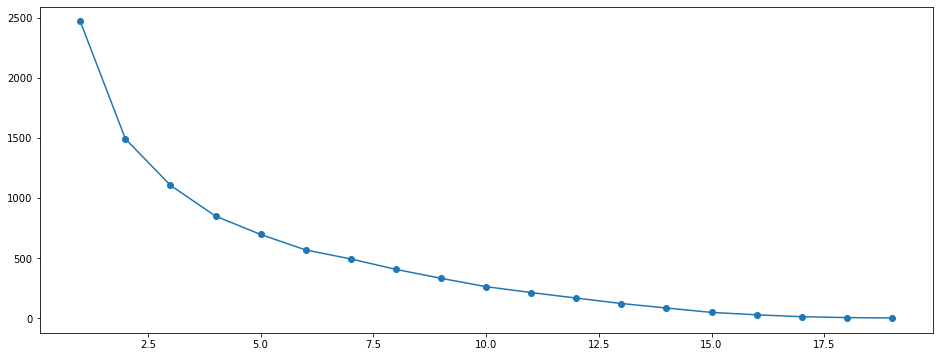

In [548]:
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

Using the SSE (sum of square errors) to generate a value for the optimal number of clusters. The graph shows that the optimal number cold be 5 or 6 clusters. So, the silhouette scores are also calculated in order to justify the choice between these two options.

Text(0.5, 1.0, 'Silhouette Score per # of Clusters')

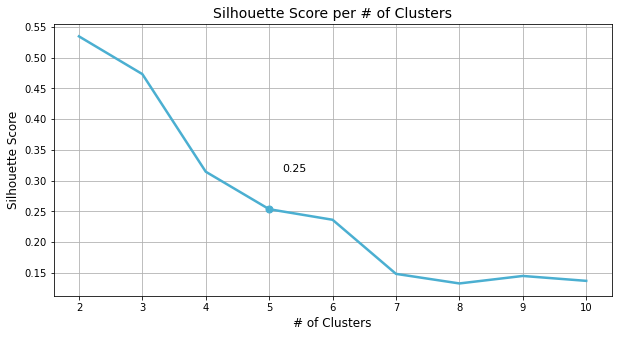

In [549]:
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters).fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, 
                                              kmeans.labels_))
    
plt.figure(figsize=(10, 5))
plt.plot(range(0, 9), silhouette_scores, color='#4bafd1', linewidth=2.5,
         marker='o', markersize=7.0, markevery=[3])
plt.annotate(round(silhouette_scores[3], 2), (3.2, silhouette_scores[2]),
             fontsize=11)
plt.grid()
plt.xticks(ticks=range(0, 9), labels=range(2, 11))
plt.xlabel('# of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score per # of Clusters', fontsize=14)

The silhouette score determines that 5 clusters is the optimal

In [551]:
clusters = KMeans(5)  
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_

highstreet_dimensions['cluster_label'] = clusters.labels_
highstreet_dimensions.head()
highstreet_dimensions.sort_values(by=['cluster_label'],ascending = True)
X.head(6)

,total_buildings,total_floor_area,mean_floor_area,total_rental_valuation,mean_rental_valuation,Industrial General,Industrial Light,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cultural Attractions,...,Takeaway/sandwich shop,Hotel/bed & breakfast/guest house,Retailers - supermarkets/hypermarkets,Hospitals/Childcare/Caring Premises,Pub/bar/nightclub,School/college/university,Other catering premises,Mobile caterer,Manufacturers/packers,Distributors/Transporters
0,679,63309,93,16526340,24339,27,0,0,0,0,...,2,1,0,0,0,0,0,0,0,0
1,1043,78485,75,14851550,14239,27,0,0,0,0,...,3,1,0,0,2,3,0,0,0,0
2,11736,1842299,156,758574264,64636,309,0,134,1,0,...,182,7,9,2,40,2,1,0,1,1
3,621,54196,87,11481400,18488,0,0,0,0,0,...,2,0,0,0,1,0,0,0,0,0
4,1198,154736,129,51672550,43132,0,0,0,0,0,...,3,1,0,0,2,1,1,0,0,0
5,4829,625320,129,149837010,31028,146,0,3,0,35,...,31,0,6,1,10,1,3,0,1,0


In [552]:
highstreet_dimensions

,Unnamed: 0,total_buildings,total_floor_area,mean_floor_area,total_rental_valuation,mean_rental_valuation,Industrial General,Industrial Light,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,...,Hotel/bed & breakfast/guest house,Retailers - supermarkets/hypermarkets,Hospitals/Childcare/Caring Premises,Pub/bar/nightclub,School/college/university,Other catering premises,Mobile caterer,Manufacturers/packers,Distributors/Transporters,cluster_label
0,Belsize,679,63309,93,16526340,24339,27,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Brecknock,1043,78485,75,14851550,14239,27,0,0,0,...,1,0,0,2,3,0,0,0,0,0
2,CamdenT,11736,1842299,156,758574264,64636,309,0,134,1,...,7,9,2,40,2,1,0,1,1,1
3,Cricklewood,621,54196,87,11481400,18488,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Eversholt,1198,154736,129,51672550,43132,0,0,0,0,...,1,0,0,2,1,1,0,0,0,4
5,Fortress,4829,625320,129,149837010,31028,146,0,3,0,...,0,6,1,10,1,3,0,1,0,3
6,Fortune,763,71489,93,16685250,21867,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
7,Hampstead,4095,431168,105,253360950,61870,0,0,0,0,...,0,1,2,5,3,0,1,1,0,2
8,Haverstock,1054,143668,136,46504050,44121,0,1,0,0,...,0,1,0,3,1,0,0,0,0,4
9,Kentish,1566,204671,130,31687640,20234,99,2,0,0,...,1,0,1,6,0,0,0,0,2,0


In [555]:
highstreet_dimensions.plot(geometry)

NameError: name 'geometry' is not defined